In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Using Pandas version:", pd.__version__)
print("Using NumPy version:", np.__version__)
print("Using Seaborn version:", sns.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using Pandas version: 2.2.3
Using NumPy version: 2.2.1
Using Seaborn version: 0.13.2


In [2]:
#Spatial aggregation. [4 Marks]
#Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [3]:
data = pd.read_csv("Data.csv")
s_data=data.groupby(data['state'])['PM2.5']
average_s_data=s_data.mean()
max_station=average_s_data.idxmax()
max_value=average_s_data.max()
print(f'\n The maximum PM2.5 is in state {max_station}:{max_value}')


 The maximum PM2.5 is in state Delhi:104.1009176780069


In [4]:
#Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [5]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data_2023 = data[data['Timestamp'].dt.year == 2023]
df_hazardous = data_2023[data_2023['PM2.5'] > 300]

state_hazardous_days = df_hazardous.groupby('state')['Timestamp'].nunique()
most_hazardous_state = state_hazardous_days.idxmax()

print("State with the most days with hazardous PM2.5 levels in 2023:")
print(most_hazardous_state, 'with', state_hazardous_days[most_hazardous_state], 'days')

State with the most days with hazardous PM2.5 levels in 2023:
Delhi with 49 days


In [6]:
#Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [7]:
state_variability = s_data.std()
most_variable_state = state_variability.idxmax()
print(most_variable_state)

Delhi


In [8]:
#Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [9]:
data_covid = data[(data['Timestamp'].dt.year == (2020)) |(data['Timestamp'].dt.year == (2021))]
average_data_covid=data_covid.groupby(data['state'])['PM2.5'].mean()
msc=average_data_covid.idxmin()
mvc=average_data_covid.min()
print(f'\n The minimum PM2.5 is in state {msc}:{mvc}')


 The minimum PM2.5 is in state Mizoram:14.323350150801287


In [10]:
##Temporal Aggregation [3 Marks]
#Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [11]:
data['Timestamp']=pd.to_datetime(data['Timestamp'],format='%Y-%m-%d')
mask=(data['Timestamp'].dt.year==2020) & (data['Timestamp'].dt.month==8)
req_df=data[mask]
df=req_df.groupby('station')['PM2.5']
print(f"The station with highest PM2.5 value is {df.max().idxmax()} with the value : {df.max().max()}")# first finding the maximum value then to report the maximum value among those max values

The station with highest PM2.5 value is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with the value : 805.51


In [12]:
#For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
#[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

In [13]:
data['Timestamp']=pd.to_datetime(data['Timestamp'],format='%Y-%m-%d')
data.loc[:,'PM2.5']=pd.to_numeric(data['PM2.5'],errors='coerce').fillna(0)
winter_mask=(data['Timestamp'].dt.year==2018) & (data['Timestamp'].dt.month.isin([12 ,1, 2])) & (data['station']== "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
summer_mask=(data['Timestamp'].dt.year==2018) & (data['Timestamp'].dt.month.isin([3 , 4 , 5])) & (data['station']== "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
monsoon_mask=(data['Timestamp'].dt.year==2018) & (data['Timestamp'].dt.month.isin([6 , 7 , 8])) & (data['station']== "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
winter_df=data[winter_mask]
summer_df=data[summer_mask]
monsoon_df=data[monsoon_mask]
print(f"The average value of winter is:{winter_df['PM2.5'].mean()}\n")
print(f"The average value of summer is:{summer_df['PM2.5'].mean()}\n")
print(f"The average value of monsoon is:{monsoon_df['PM2.5'].mean()}\n")
list1=np.array([winter_df['PM2.5'].mean(),summer_df['PM2.5'].mean(),monsoon_df['PM2.5'].mean()])
print(max(list1))

The average value of winter is:22.497448121149265

The average value of summer is:0.0

The average value of monsoon is:10.477233599662172

22.497448121149265


In [14]:
#Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
#Calculate the monthly average PM2.5 for weekdays and weekends separately
#X-axis: Months (January to December).
#Y-axis: Average PM2.5 levels.
#Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

the avg of weekends> the avg of weekdays
The monthly avg for weekdays is: month
1     10.426322
2     53.946216
3     53.167747
4     20.702575
5      6.841749
6      7.695810
7      8.652231
8      0.000000
9      0.000000
10    12.594902
11    42.091224
12    88.985127
Name: PM2.5, dtype: float64 
 and the monthly avg of weekends is: month
1     23.038473
2     56.287081
3     51.942440
4     21.158359
5      6.422662
6      9.100678
7      6.356508
8      0.000000
9      0.000000
10     5.284207
11    48.326451
12    74.505459
Name: PM2.5, dtype: float64
819866     4
820427     5
820988     6
821549     0
822110     1
          ..
1021826    0
1022387    1
1022948    2
1023509    3
1024070    4
Name: Timestamp, Length: 365, dtype: int32


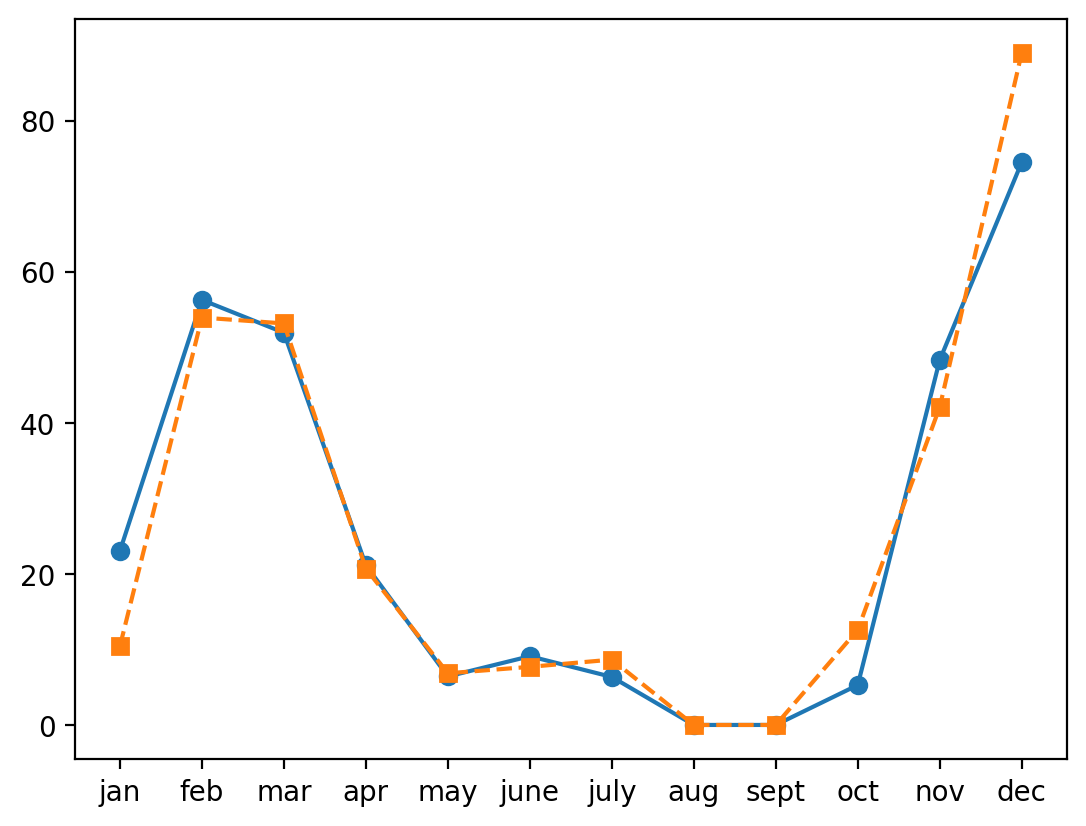

In [15]:
#7
data['Timestamp']=pd.to_datetime(data['Timestamp'],format='%Y-%m-%d')
mask=(data['Timestamp'].dt.year==2021) & (data['station']== "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
req_data=data[mask].copy()
req_data['day_of_week'] = req_data['Timestamp'].dt.dayofweek
weekend_mask=req_data['day_of_week']<5
weekdays_mask=req_data['day_of_week']>=5
avg_weekends=req_data.loc[weekend_mask,'PM2.5'].mean()
avg_weekdays=req_data.loc[weekdays_mask,'PM2.5'].mean()
if avg_weekends>avg_weekdays:
    print("the avg of weekends> the avg of weekdays")
else:
    print("the avg of weekdays> the avg of weekends")
req_data['month'] = req_data['Timestamp'].dt.month
weekend_data=req_data[weekend_mask]
weekdays_data=req_data[weekdays_mask]
grp1=weekend_data.groupby('month')['PM2.5'].mean()
grp2=weekdays_data.groupby('month')['PM2.5'].mean()
print(f'The monthly avg for weekdays is: {grp2} \n and the monthly avg of weekends is: {grp1}')
print(req_data['Timestamp'].dt.dayofweek)
fig,ax=plt.subplots()
ax.plot(grp1.index,grp1,marker='o',linestyle='-')
ax.plot(grp2.index,grp2,marker='s',linestyle='--')
plt.xticks(ticks=range(1,13),labels=['jan','feb','mar','apr','may','june','july','aug','sept','oct','nov','dec'])
plt.show()

In [16]:
##Spatio-temporal aggregation [3 marks]
#For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [17]:
data['Timestamp']=pd.to_datetime(data['Timestamp'],format='%Y-%m-%d')
data['PM2.5']=pd.to_numeric(data['PM2.5'],errors='coerce').fillna(0)
summer_mask=(data['Timestamp'].dt.year==2018) & (data['Timestamp'].dt.month.isin([3 , 4 , 5]))
monsoon_mask=(data['Timestamp'].dt.year==2018) & (data['Timestamp'].dt.month.isin([6 , 7 , 8]))
summer_data=data[summer_mask]
monsoon_data=data[monsoon_mask]
grp1=monsoon_data.groupby('state')['PM2.5'].mean()
grp2=summer_data.groupby('state')['PM2.5'].mean()
percent_change=((grp1-grp2)/grp2)*100
print(f'the state with most change is:{percent_change.abs().idxmax()} with value {percent_change.abs().max()} %')

the state with most change is:Karnataka with value 118.31040079624269 %


In [18]:
#Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

In [19]:
data['Timestamp']=pd.to_datetime(data['Timestamp'],format='%Y-%m-%d')
winter_mask=(data['Timestamp'].dt.year==2017) & (data['Timestamp'].dt.year==2023) & (data['Timestamp'].dt.month.isin([12 ,1, 2])) & (data['state']=='Delhi')
summer_mask=(data['Timestamp'].dt.year==2017) & (data['Timestamp'].dt.year==2023)  & (data['Timestamp'].dt.month.isin([3 , 4 , 5])) & (data['state']=='Delhi')
monsoon_mask=(data['Timestamp'].dt.year==2017) & (data['Timestamp'].dt.year==2023) & (data['Timestamp'].dt.month.isin([6 , 7 , 8])) & (data['state']=='Delhi')
winter_data=data[winter_mask]
summer_data=data[summer_mask]
monsoon_data=data[monsoon_mask]
winter_avg=winter_data['PM2.5'].mean()
summer_avg=summer_data['PM2.5'].mean()
monsoon_avg=monsoon_data['PM2.5'].mean()
print(winter_avg)
print(summer_avg)
print(monsoon_avg)
#incomplete

nan
nan
nan


In [20]:
#Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

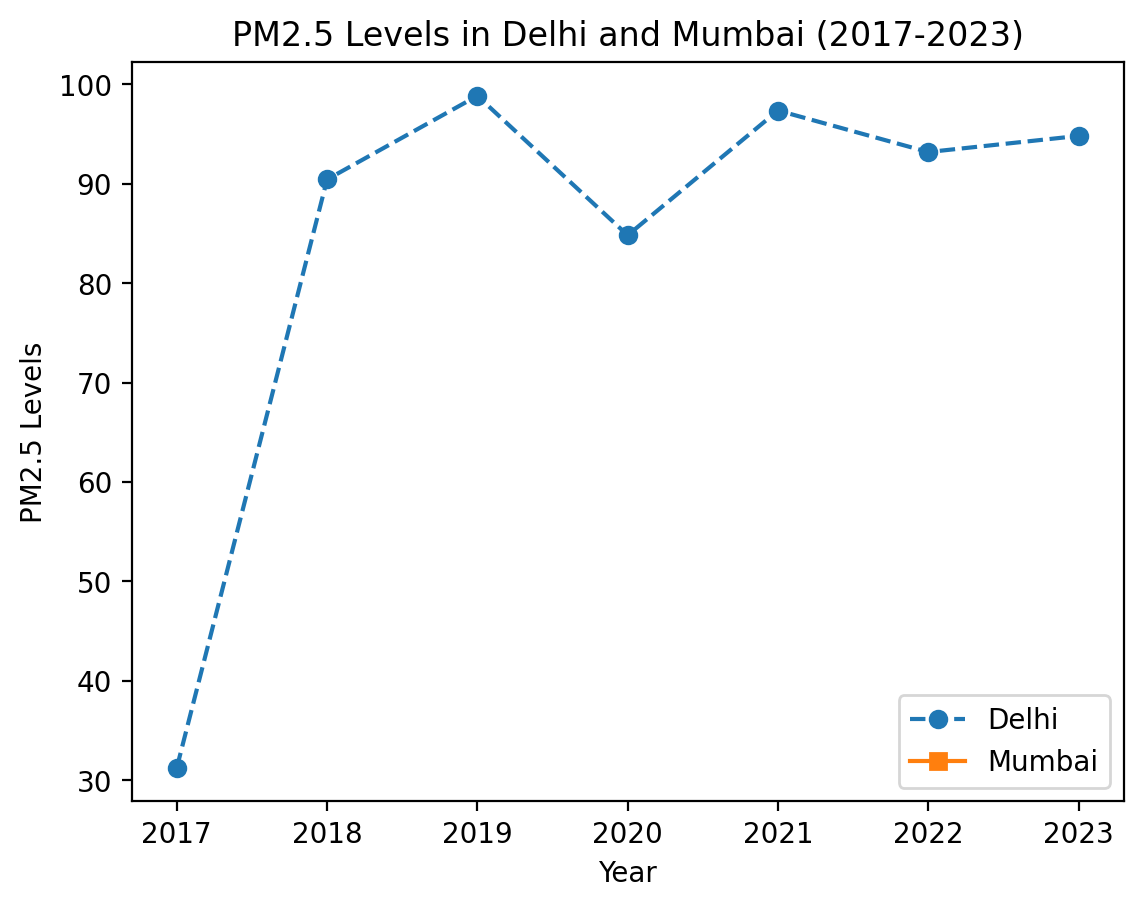

In [21]:
data['Timestamp']=pd.to_datetime(data['Timestamp'],format='%Y-%m-%d')
delhi_mask=(data['Timestamp'].dt.year>=2017) & (data['Timestamp'].dt.year<=2023) & (data['state']=='Delhi')
mumbai_mask=(data['Timestamp'].dt.year>=2017) & (data['Timestamp'].dt.year<=2023) & (data['state']=='Mumbai')
delhi_data=data[delhi_mask]
mumbai_data=data[mumbai_mask]
grp1=delhi_data.groupby(delhi_data['Timestamp'].dt.year)['PM2.5'].mean()
grp2=mumbai_data.groupby(mumbai_data['Timestamp'].dt.year)['PM2.5'].mean()
year_union=grp1.index.union(grp2.index).sort_values() #this will ensure that the data of the mumbai also appears on the graph because if Mumbai's data is missing for some years, grp2.index may not align with grp1.index, making it invisible in the plot.
plt.plot(grp1.index,grp1,marker='o',label='Delhi',linestyle='--')
plt.plot(grp2.index,grp2,marker='s',label='Mumbai',linestyle='-')
plt.xticks(year_union)
plt.xlabel("Year")
plt.ylabel("PM2.5 Levels")
plt.title("PM2.5 Levels in Delhi and Mumbai (2017-2023)")
plt.legend()
plt.show()
#incomplete

In [22]:
##Population-Based [3 Marks]
#Which state in India has the highest number of monitoring stations relative to its population? 

In [23]:
state_data=pd.read_csv("State_data.csv")
comparision_data=state_data.groupby(data['station'])['Population']
print(f'the station with highest monitaring station is {comparision_data.mean().idxmax()} with value {comparision_data.mean().max()}')

the station with highest monitaring station is 32Bungalows, Bhilai - CECB with value 199812341.0


In [24]:
#Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

In [25]:
data['PM2.5'] = data['PM2.5'].fillna(0)
state_data.rename(columns={'State': 'state'}, inplace=True)#state_data.rename(columns={'State': 'state'}, inplace=True) to rename the coloumn
merged_data=pd.merge(data,state_data,on='state',how='left')
merged_data['per captia PM2.5']=merged_data['PM2.5']/merged_data['Population']
group=merged_data.groupby('state')['per captia PM2.5'].mean()
top_5=group.nlargest()
print(top_5)

state
Chandigarh           0.000026
Puducherry           0.000009
Nagaland             0.000009
Arunachal Pradesh    0.000006
Sikkim               0.000006
Name: per captia PM2.5, dtype: float64


In [26]:
#Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
#X-axis: Population density (people per square kilometer).
#Y-axis: Average PM2.5 concentration.
#Use a scatter plot to show the relationship, where each point represents a state.

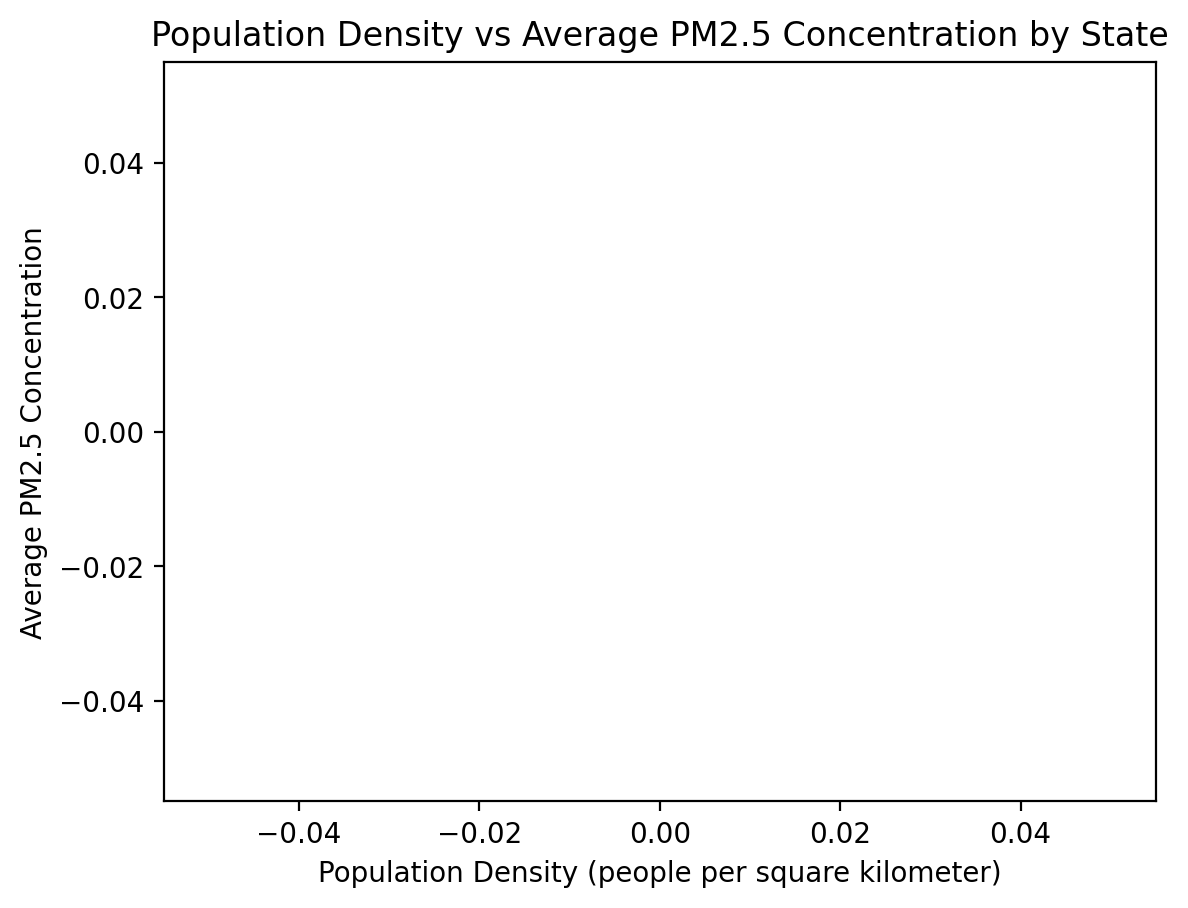

In [27]:
state_avg_pm = merged_data.groupby('state')['PM2.5'].mean()
population_density=merged_data['Population']/merged_data['Area (km2)']
plot_data=pd.DataFrame({
    'population density':population_density,
    'avg PM2.5':state_avg_pm
})
plot_data.dropna(inplace=True)
plt.scatter(plot_data['population density'],plot_data['avg PM2.5'])
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Population Density vs Average PM2.5 Concentration by State')
plt.show()
#check

In [28]:
##Area Based [3 Marks]
#Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
#X-axis: States.
#Y-axis: PM2.5 concentration per square kilometer.
#Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

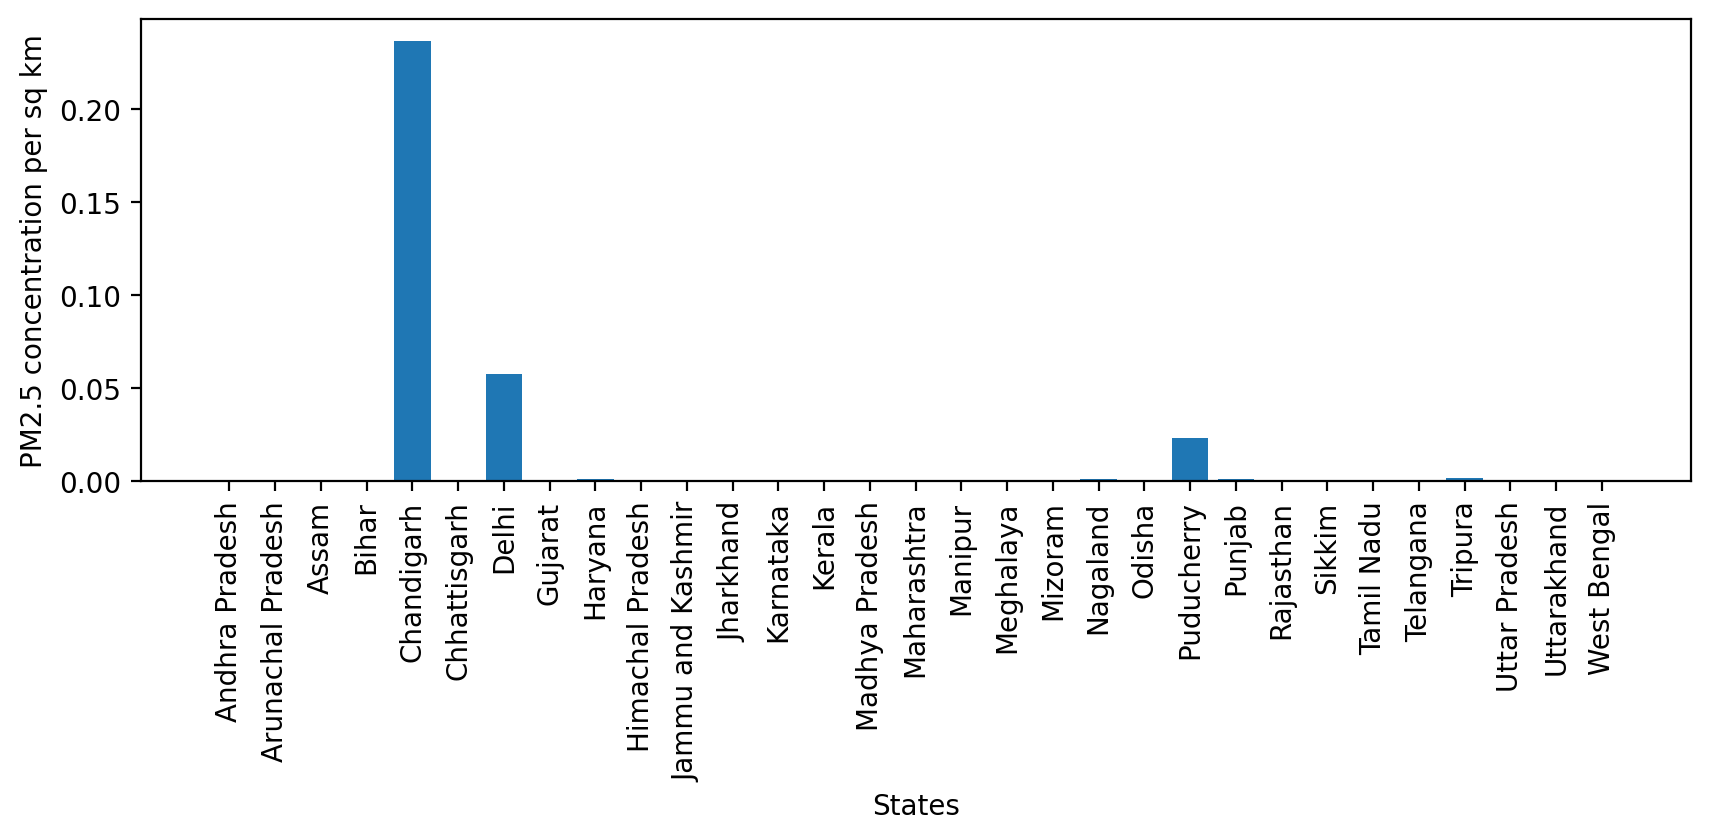

In [29]:
state = pd.read_csv("State_data.csv")
s=data.groupby(data['state'])['PM2.5'].mean()
s1=state.groupby(state['State'])['Area (km2)'].mean()
p=s/s1
plt.figure(figsize=(10,3))
plt.bar(p.index,p)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('PM2.5 concentration per sq km')
plt.show()

In [30]:
#Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

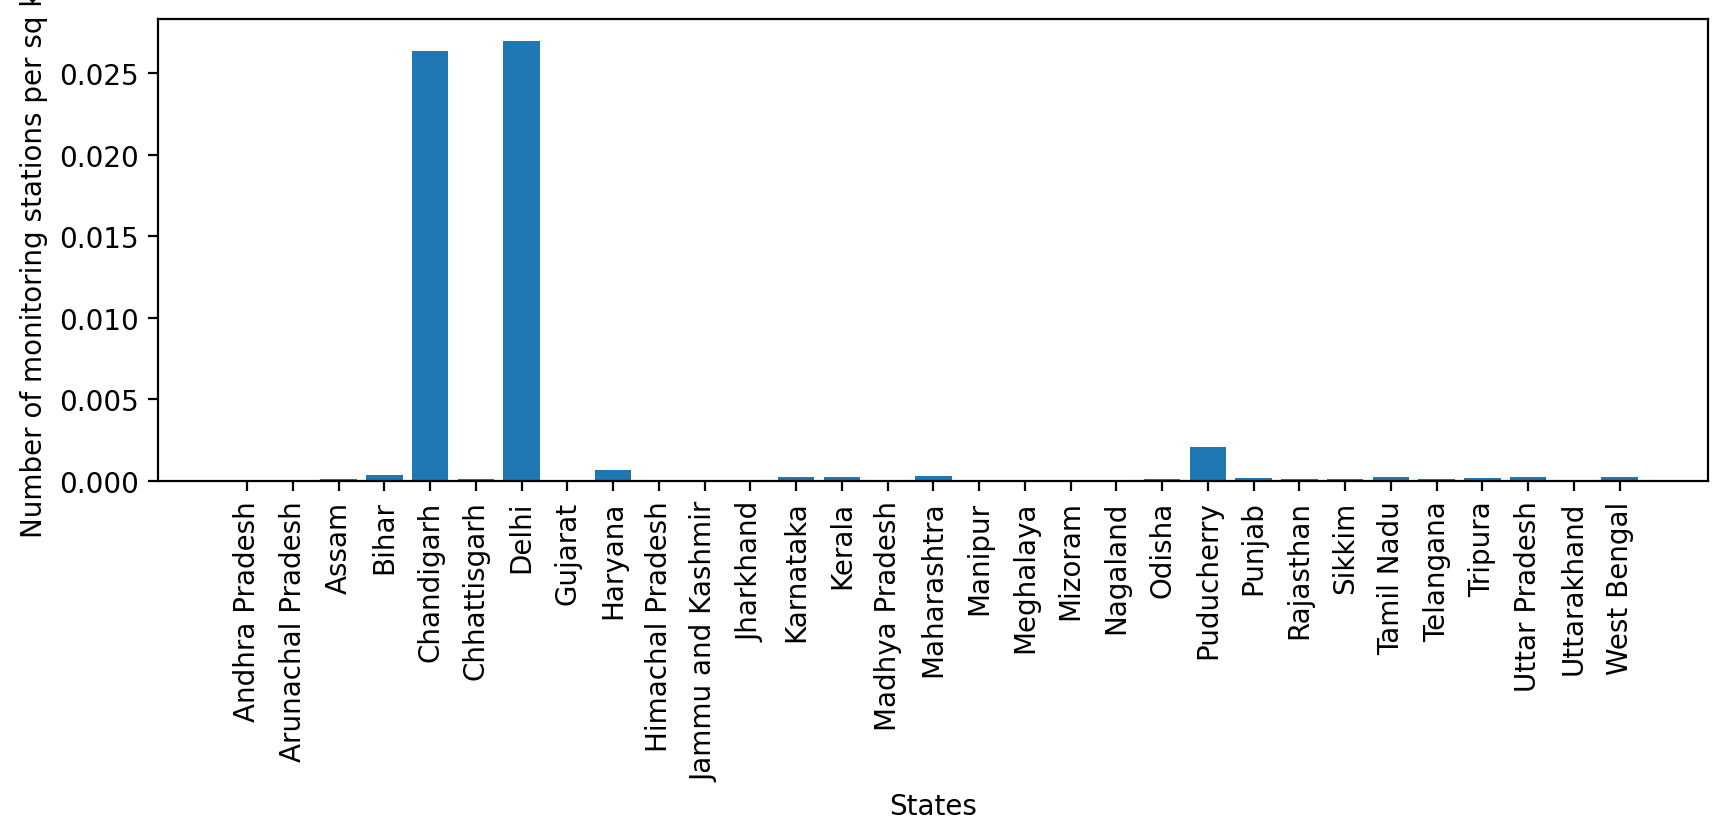

In [31]:
ms = data.groupby('state')['station'].nunique()
q=ms/s1
plt.figure(figsize=(10,3))
plt.bar(q.index,q)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of monitoring stations per sq km')
plt.show()

In [32]:
#Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [35]:
data_2021=data[data['Timestamp'].dt.year==2021]
a=data_2021.groupby('state')['PM2.5'].mean()
print('Maharashtra:',a['Maharashtra'])
print('Madhya Pradesh:',a['Madhya Pradesh'])
state['Density']=state['Population']/state['Area (km2)']
print('Population density of Madhya Pradesh:',state.loc['Madhya Pradesh']['Density'],'Population desnity of Mahrashtra:', state.loc['Maharashtra']['Density'])
#Despite having a higher population density than Madhya Pradesh, Maharashtra has lower PM2.5 levels than Madhya Pradesh. Usually places with higher population desnity have higher PM2.5 levels, here it is either that higher population density causes lower PM2.5 concentration or there is no correlation. We are also ignoring other factors like the density of indutries in each state.

Maharashtra: 16.943878245950337
Madhya Pradesh: 24.700029531979887


KeyError: 'Madhya Pradesh'

In [ ]:
##Funding Based [3 Marks]
#Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

C:\Users\ahast\AppData\Local\Temp\ipykernel_15640\2564679686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["Funding Status"] = data_2021["state"].apply(assign_funding_status)


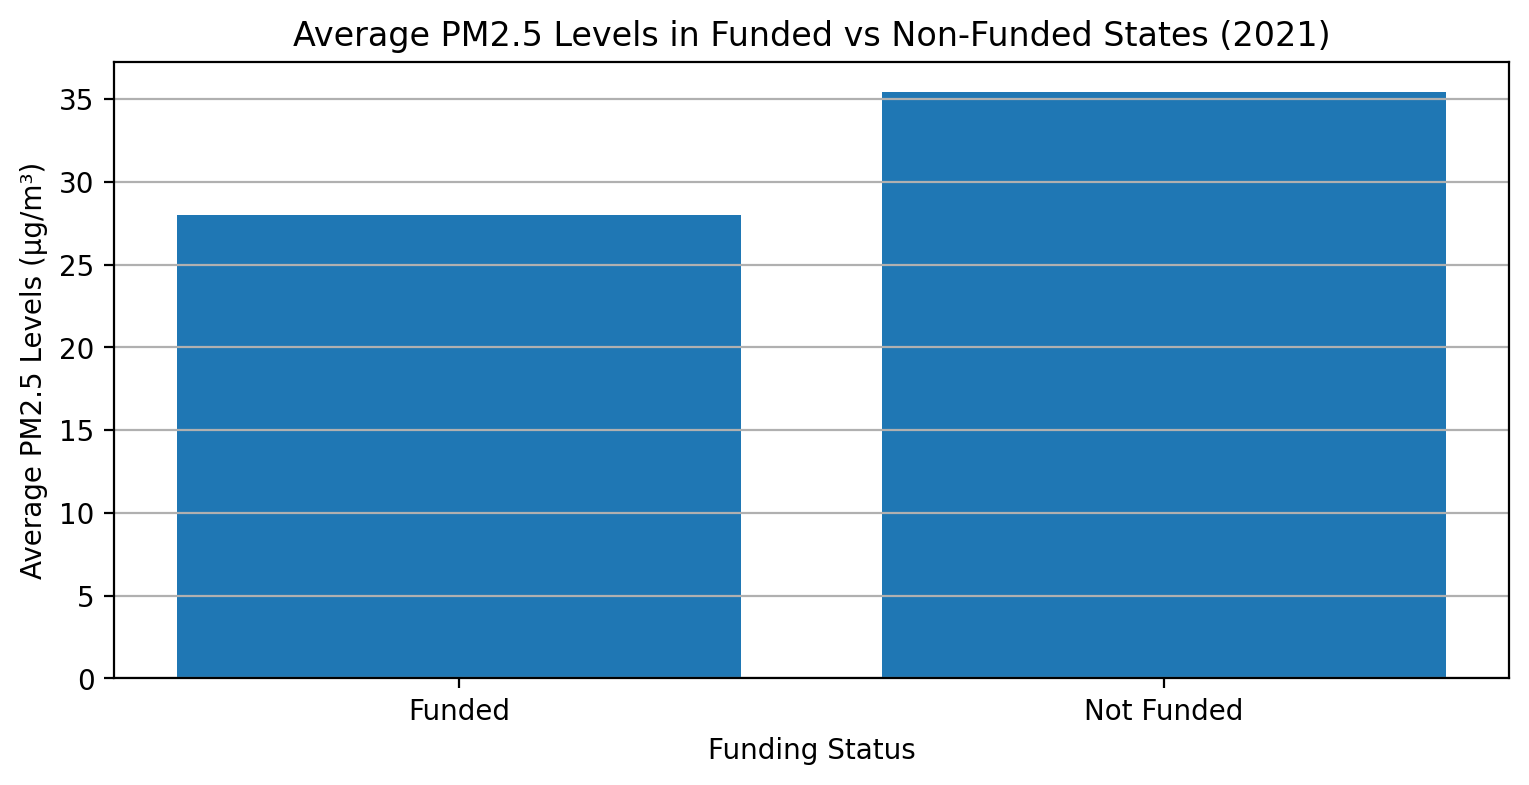

In [36]:
ncap=pd.read_csv("NCAP_Funding.csv")
funded_states = ncap["State"].unique()
def assign_funding_status(state):
    if state in funded_states:
        return "Funded"
    else:
        return "Not Funded"

data_2021["Funding Status"] = data_2021["state"].apply(assign_funding_status)
funding_comparison = data_2021.groupby("Funding Status")["PM2.5"].mean()

plt.figure(figsize=(9, 4))
plt.bar(funding_comparison.index,funding_comparison)
plt.xlabel("Funding Status")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title("Average PM2.5 Levels in Funded vs Non-Funded States (2021)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

In [37]:
#Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

<Axes: xlabel='Timestamp'>

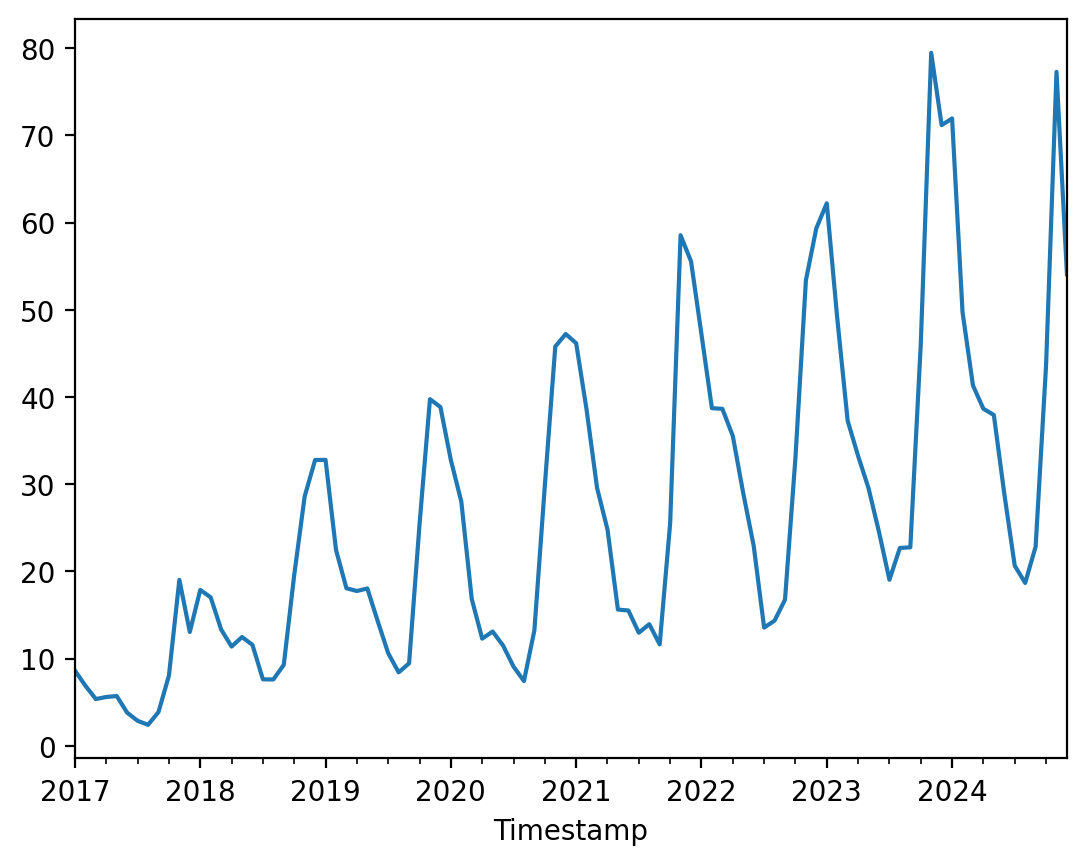

In [38]:
data_assam = data[data["state"] == "Assam"]
monthly_avg = data.groupby(pd.Grouper(key='Timestamp', freq='MS'))['PM2.5'].mean()
monthly_avg.plot()


#Amount released during FY 2019-20
#Amount released during FY 2020-21
#Amount released during FY 2021-22

In [39]:
#Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

In [40]:
state = state_data.set_index("State")

state_total_funding = ncap_funding.groupby("State")["Total fund released"].sum()
state_df_with_funding  = state_df.join(state_total_funding)
state_df_with_funding.sort_index(inplace=True)

_, ax = plt.subplots(figsize = (15, 10))

for state in state_df_with_funding.index:
    ax.scatter(x = state_df_with_funding.loc[state, "Area (km2)"], y = state_df_with_funding.loc[state, "Population"], color = np.random.rand(3,), label = state, s = 100)

ax.set_title("Funding vs Area of States")
ax.set_xlabel("$Area\\ (km^2)$")
ax.set_ylabel("Funding (in crore Rupees)")
ax.legend(title = "State", ncol = 2, bbox_to_anchor = (1, 1), fancybox = True)

plt.show()

KeyError: "None of ['State'] are in the columns"

In [43]:
#Miscellaneous Questions [5 Marks]
#For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]

In [44]:
c_data=data_2023.groupby(data_2023['city'])['PM2.5']
average_c_data=s_data.mean()
max_city=average_c_data.idxmax()
max_value=average_c_data.max()
state_days = data_2023.groupby('state')['Timestamp'].nunique()
state_hazardous_days = df_hazardous.groupby('state')['Timestamp'].nunique()
print("Percentage of days with PM2.5 levels above the hazardous threshold is:", state_hazardous_days[max_city]/state_days[max_city]*100)

Percentage of days with PM2.5 levels above the hazardous threshold is: 13.424657534246576


In [45]:
#Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]

In [48]:
import datetime

def get_mean_pm25(df):
    return df.groupby("state")["PM2.5"].mean()

def compare_levels(df, year):
    year_data = df[df["Timestamp"].dt.year == year]

    diwali_mask = year_data["Timestamp"].dt.month.isin((10, 11))    
    new_year_mask = year_data["Timestamp"].dt.date == datetime.date(year, 1, 1)
    regular_mask = ~(diwali_mask | new_year_mask)

    regular_avg = get_mean_pm25(year_data[regular_mask])
    diwali_avg = get_mean_pm25(year_data[diwali_mask])
    new_year_avg = get_mean_pm25(year_data[new_year_mask])
    return diwali_avg["Delhi"], new_year_avg["Delhi"], regular_avg["Delhi"]

for year in range(2018, 2025):
    diwali, new_year, regular = compare_levels(dataset, year)
    print(f"Year: {year}")
    print(f"Average PM2.5 levels during Diwali (October-November): {diwali:.2f}")
    print(f"Average PM2.5 levels during New Year: {new_year:.2f}")
    print(f"Average PM2.5 levels during the rest of the year: {regular:.2f}\n")

dates = dataset.groupby("Timestamp")["PM2.5"].mean()
yearwise_spikes = dates.groupby(dates.index.year).idxmax()

ax = dates.plot(figsize = (10, 10))

for timestamp in yearwise_spikes:
    ax.annotate(
        f"{timestamp.strftime("%d/%m/%y")}",
        (timestamp, dates[timestamp]),
        xytext = (30, 15),
        textcoords = 'offset points',
        arrowprops = dict(arrowstyle = '->')
    )

plt.show()
print("In the above graph, the maximum PM2.5 levels for each year are marked with an arrow and annotated with the date. We can observe that these dates are almost always in the Diwali period or around New Year.")

NameError: name 'dataset' is not defined

In [47]:
#Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]

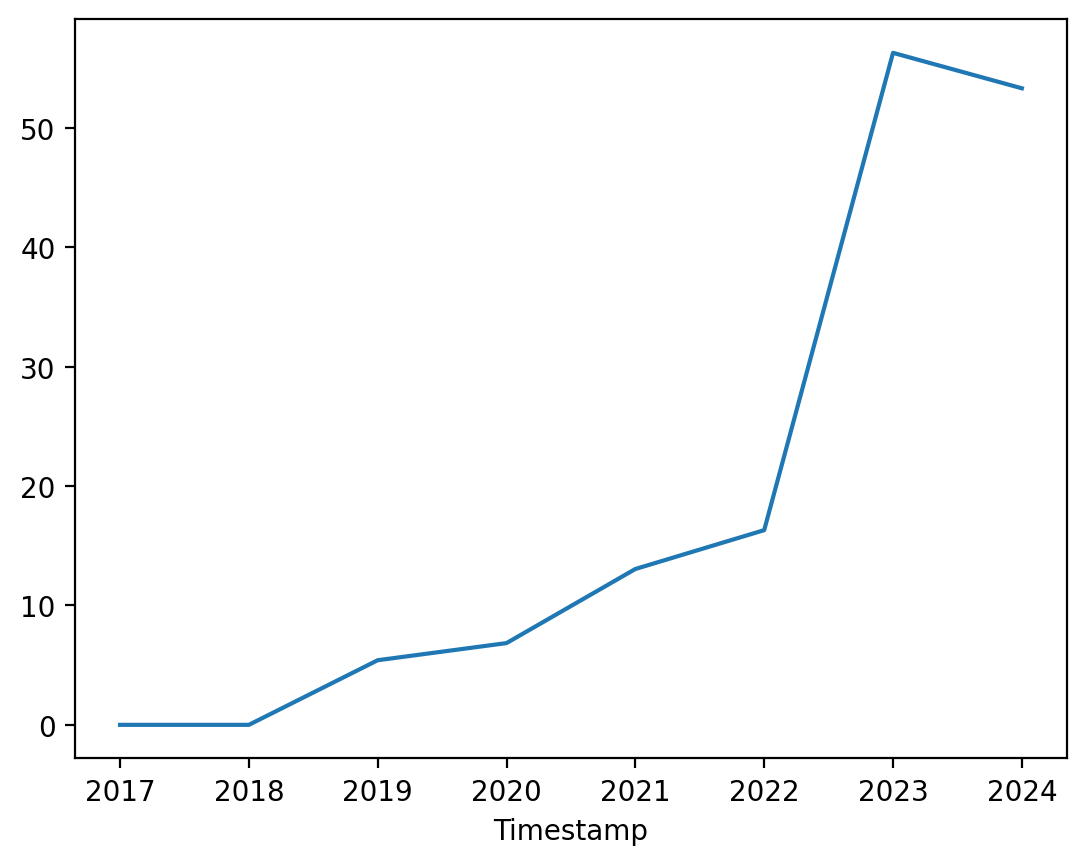

The most funded state in 2020 was Assam. The average PM2.5 levels for Andhra Pradesh had been decreasing since 2017 and had already improved a lot from 2017 to 2020. However, from 2020 to 2023, the average PM2.5 levels increased. This shows that the funds might not have been used properly to improve the air quality.


In [53]:
def get_funding(fy):
    return f"Amount released during FY 20{fy}"
most_funded_state = ncap.groupby("State")[get_funding("20-21")].sum().idxmax()

yearly_pollution = data.groupby([data["Timestamp"].dt.year, "state"])["PM2.5"].mean()

yearly_pollution.loc[:, most_funded_state].plot()
plt.show()

print(f"The most funded state in 2020 was {most_funded_state}. The average PM2.5 levels for Andhra Pradesh had been decreasing since 2017 and had already improved a lot from 2017 to 2020. However, from 2020 to 2023, the average PM2.5 levels increased. This shows that the funds might not have been used properly to improve the air quality.")

In [ ]:
#Draw the map of India and plot the sensor locations on the map.[1.5 Mark]

In [55]:
import folium

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

unique_stations = data.drop_duplicates(subset = ["station"])
unique_stations = unique_stations.dropna(subset = ["latitude", "longitude"])

for _, row in unique_stations.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup = f"{row['station']}, {row['state']}").add_to(m)

m